In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Put this when it's called
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('VMI_Data_PA_V02_AK6.csv')
df_raw = df.copy()
#df_bp1 = pd.read_csv('VMI_Data_BP1_V02_AK6.csv')
#df_bp2 = pd.read_csv('VMI_Data_BP2_V02_AK6.csv')

In [4]:
df.columns
#df_bp1.columns
#df_bp2.columns

Index(['MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
       'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
       'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
       'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
       'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'PA_BUILD_DATE', 'PA_MACHINEID'],
      dtype='object')

In [5]:
df.head()



,MACHINE_ID,DATE_TIME_STAMP,GT_BARCODE,TIRE_TYPE,CUT_LENGTH,CONV_WAIT_TIME,LFT_SPLICE_LENGTH,MID_SPLICE_LENGTH,RHT_SPLICE_LENGTH,SPLICE_LIMIT_LOW,...,PA_S3_R,PA_S4_R,PA_S5_R,PA_S6_R,PA_S7_R,PA_S8_R,PA_PART,PA_BARCODE,PA_BUILD_DATE,PA_MACHINEID
0,V02,05:28.5,AK6T27O,AK6,1709.019,71.075,11.038190,17.25513,10.414630,3.5,...,0.05,0.05,0.05,0.05,0.0,0.0,AXLF9CA,083118041421AXLF9CA 02,14:21.5,122CL5RC01
1,V02,10:44.0,AK6T27P,AK6,1709.061,240.254,8.342554,17.77419,9.584214,3.5,...,0.05,0.05,0.05,0.05,0.0,0.0,AXLF9CA,083118041421AXLF9CA 02,14:21.5,122CL5RC01
2,V02,13:30.9,AK6T27Q,AK6,1709.131,424.922,10.103850,19.95048,10.206630,3.5,...,0.05,0.05,0.05,0.05,0.0,0.0,AXLF9CA,083118041421AXLF9CA 02,14:21.5,122CL5RC01
3,V02,14:31.7,AK6T27R,AK6,1708.687,5.100,13.525110,18.28922,9.897580,3.5,...,0.05,0.05,0.05,0.05,0.0,0.0,AXLF9CA,083118041421AXLF9CA 02,14:21.5,122CL5RC01
4,V02,16:52.6,AK6T27S,AK6,1708.419,5.103,13.627740,18.70882,12.488710,3.5,...,0.05,0.05,0.05,0.05,0.0,0.0,AXLF9CA,083118041421AXLF9CA 02,14:21.5,122CL5RC01


In [6]:
df.describe()

,CUT_LENGTH,CONV_WAIT_TIME,LFT_SPLICE_LENGTH,MID_SPLICE_LENGTH,RHT_SPLICE_LENGTH,SPLICE_LIMIT_LOW,SPLICE_LIMIT_HIGH,SPLICE_OK,PA_S8_L,PA_S7_L,...,PA_S2_L,PA_S1_ML,PA_S1_MR,PA_S2_R,PA_S3_R,PA_S4_R,PA_S5_R,PA_S6_R,PA_S7_R,PA_S8_R
count,123937.000000,123937.000000,123365.000000,123498.000000,123906.000000,123937.0,123937.0,123937.000000,123937.000000,123937.000000,...,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000
mean,1707.139231,39.920708,7.352208,17.104172,7.166355,3.5,11.0,0.000250,0.007863,0.008968,...,0.272409,0.027285,0.027397,0.307905,0.324977,0.312425,0.037341,0.036979,0.010168,0.005373
std,4.017455,175.109691,2.140055,5.741944,2.180504,0.0,0.0,0.015813,0.031832,0.035330,...,0.136010,0.073235,0.073749,0.139603,0.148045,0.146204,0.101972,0.051248,0.041300,0.022809
min,1089.281000,4.799000,-13.438310,-34.990450,-58.815900,3.5,11.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1706.352000,5.112000,6.043627,15.803020,5.825156,3.5,11.0,0.000000,0.000000,0.000000,...,0.200000,0.010000,0.010000,0.250000,0.260000,0.250000,0.010000,0.020000,0.000000,0.000000
50%,1707.356000,6.859000,7.305151,16.529940,7.093986,3.5,11.0,0.000000,0.000000,0.000000,...,0.290000,0.010000,0.010000,0.300000,0.300000,0.300000,0.010000,0.020000,0.000000,0.000000
75%,1708.237000,21.547000,8.653329,17.255130,8.445475,3.5,11.0,0.000000,0.000000,0.000000,...,0.300000,0.010000,0.010000,0.330000,0.330000,0.330000,0.030000,0.050000,0.000000,0.000000
max,1943.112000,10000.010000,34.460590,88.384550,47.205240,3.5,11.0,1.000000,0.200000,0.500000,...,1.000000,0.700000,0.700000,1.000000,1.000000,1.000000,1.000000,1.000000,0.700000,0.200000


In [13]:
df.corr

<bound method DataFrame.corr of        MACHINE_ID DATE_TIME_STAMP GT_BARCODE TIRE_TYPE  CUT_LENGTH  \
0             V02         05:28.5    AK6T27O       AK6    1709.019   
1             V02         10:44.0    AK6T27P       AK6    1709.061   
2             V02         13:30.9    AK6T27Q       AK6    1709.131   
3             V02         14:31.7    AK6T27R       AK6    1708.687   
4             V02         16:52.6    AK6T27S       AK6    1708.419   
5             V02         17:54.5    AK6T27T       AK6    1708.447   
6             V02         18:54.2    AK6T27U       AK6    1709.106   
7             V02         19:52.6    AK6T27V       AK6    1708.718   
8             V02         28:40.5    AK6T27W       AK6    1709.039   
9             V02         29:40.4    AK6T27X       AK6    1709.151   
10            V02         30:55.2    AK6T27Y       AK6    1708.513   
11            V02         54:41.7    AK6T27Z       AK6    1708.709   
12            V02         56:50.0    AK6T280       AK6    

In [11]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [8]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [9]:
# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

In [12]:
# Analyse missing data
draw_missing_data_table(df)

,Total,Percent
PA_MACHINEID,1423,1.148164
PA_PART,1423,1.148164
PA_BUILD_DATE,1423,1.148164
PA_BARCODE,1423,1.148164
LFT_SPLICE_LENGTH,572,0.461525
MID_SPLICE_LENGTH,439,0.354212
RHT_SPLICE_LENGTH,31,0.025013
DATE_TIME_STAMP,0,0.000000
GT_BARCODE,0,0.000000
TIRE_TYPE,0,0.000000


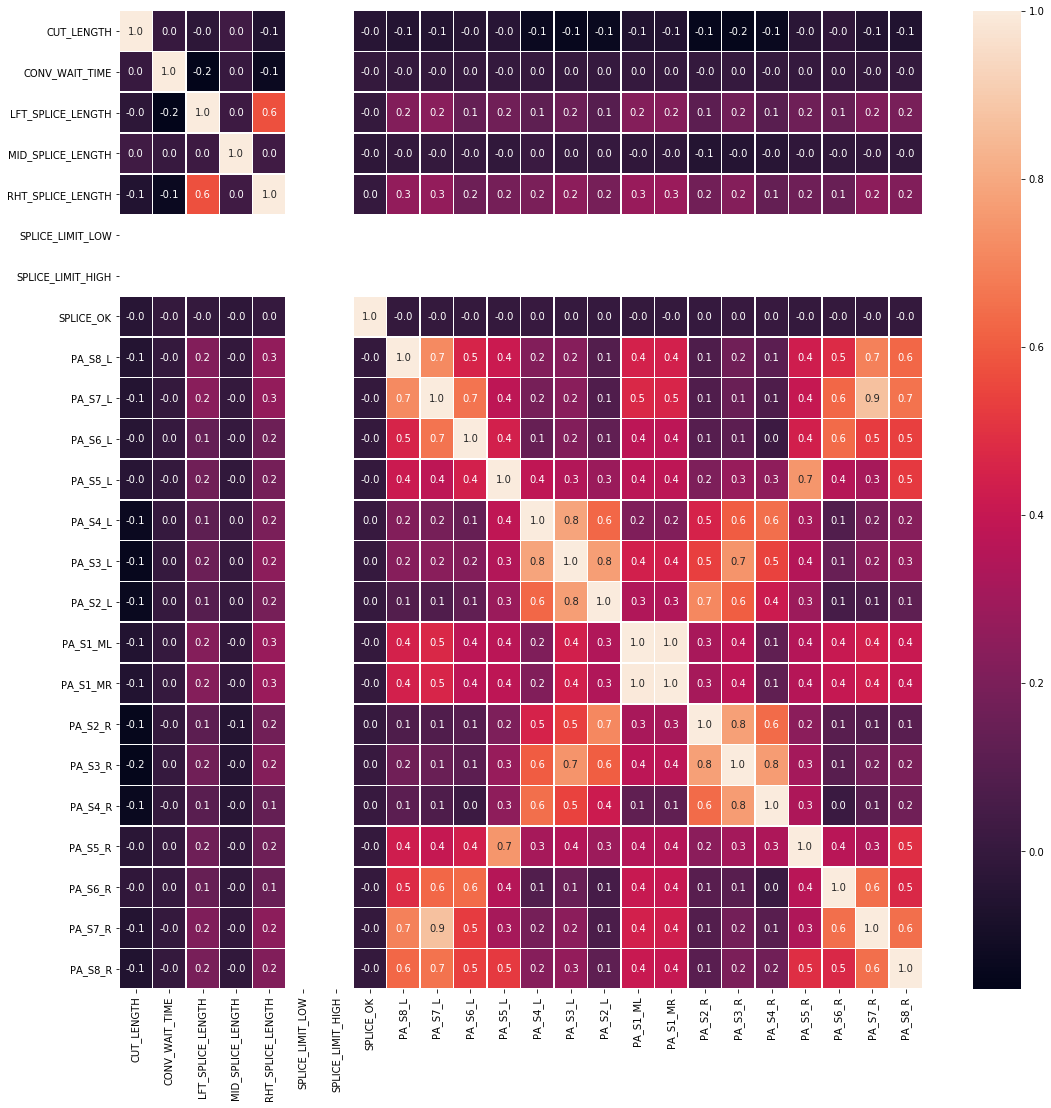

In [14]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_pa['CONV_WAIT_TIME'].skew())
print("Kurtosis: %f" % df_pa['CONV_WAIT_TIME'].kurt())

In [ ]:
df_pa['LFT_SPLICE_LENGTH'].describe()

In [ ]:
df_pa['MID_SPLICE_LENGTH'].describe()

In [ ]:
df_pa['RHT_SPLICE_LENGTH'].describe()

In [ ]:
#histogram
sns.distplot(df_pa['LFT_SPLICE_LENGTH']);

In [ ]:
#histogram
sns.distplot(df_pa['MID_SPLICE_LENGTH']);

In [ ]:
#histogram
sns.distplot(df_pa['RHT_SPLICE_LENGTH']);

In [ ]:
#histogram
sns.distplot(df_pa['LFT_SPLICE_DELTA']);

In [ ]:
#histogram
sns.distplot(df_pa['MID_SPLICE_DELTA']);

In [ ]:
#histogram
sns.distplot(df_pa['RHT_SPLICE_DELTA']);

In [ ]:
#scatter plot grlivarea/saleprice
var = 'CONV_WAIT_TIME'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

In [ ]:
#scatter plot grlivarea/saleprice
var = 'PA_S1_ML'
data = pd.concat([df_pa['MID_SPLICE_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='MID_SPLICE_LENGTH');

In [ ]:
#box plot overallqual/saleprice
var = 'PA_S1_ML'
data = pd.concat([df_pa['MID_SPLICE_LENGTH'], df_pa[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MID_SPLICE_LENGTH", data=data)
fig.axis(ymin=10, ymax=25);

In [ ]:
#correlation matrix
corrmat = df_pa.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SPLICE_OK')['SPLICE_OK'].index
cm = np.corrcoef(df_pa[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
df_pa.columns

In [ ]:
#scatterplot
#sns.set()
#cols = ['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH', 
#        'LFT_SPLICE_DELTA', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10',
#        'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 'MID_SPLICE_LENGTH', 
#        'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L',
#        'PA_S6_L', 'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L',
#        'PA_S1_ML', 'PA_S1_MR', 'PA_S2_R', 'PA_S3_R', 'PA_S4_R',
#        'PA_S5_R', 'PA_S6_R', 'PA_S7_R', 'PA_S8_R']
#sns.pairplot(df_pa[cols], size = 2.5)
#plt.show();

In [ ]:
# 'MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
# 'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
# 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
# 'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
# 'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
# 'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
# 'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'PA_BUILD_DATE', 'PA_MACHINEID',
# 'LFT_SPLICE_DELTA', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10',
# 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50'

data = []
for f in df_pa.columns:
    # Defining the role
    if f == 'SPLICE_OK':
        role = 'target'
    elif f in ['MACHINE_ID','DATE_TIME_STAMP','PA_MACHINEID',
               'PA_BUILD_DATE','PA_BARCODE','PA_PART',
               'GT_BARCODE','TIRE_TYPE']:
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
#    if f == 'CNActivityCycleTime' or f == 'CRActivityCycleTime' or f == 'CNWFCycleTime' or f == 'CRWFCycleTime':
#        level = 'interval'
#    elif f == 'CRNumber' or f == 'CNNumber':
#        level = 'nominal'
#    el
    if f == 'SPLICE_OK':
        level = 'binary'
    elif df_pa[f].dtype == object:
        level = 'nominal'
    elif df_pa[f].dtype == bool:
        level = 'binary'
    elif df_pa[f].dtype == int:
        level = 'interval'
    elif df_pa[f].dtype == float:
        level = 'interval'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f in ['MACHINE_ID','DATE_TIME_STAMP','PA_MACHINEID',
             'PA_BUILD_DATE','PA_BARCODE','PA_PART', 'GT_BARCODE',
             'TIRE_TYPE']:
        keep = False
    
    # Defining the data type 
    dtype = df_pa[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [ ]:
meta

In [ ]:
meta[(meta.level == 'nominal') & (meta.keep)].index

In [ ]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

In [ ]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
df_pa[v].describe()

In [ ]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
df_pa[v].describe()

In [ ]:
vars_with_missing = []

for f in df_pa.columns:
    #missings = df_pa[df_pa[f] == -1][f].count()
    missings = sum(pd.isnull(df_pa[f]))
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/df_pa.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

In [ ]:
df_pa.columns

In [ ]:
df_pa.CUT_LENGTH.describe()

In [ ]:
#standardizing data
cut_length_scaled = StandardScaler().fit_transform(df_pa['CUT_LENGTH'][:,np.newaxis]);
low_range = cut_length_scaled[cut_length_scaled[:,0].argsort()][:10]
high_range= cut_length_scaled[cut_length_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'PA_S1_ML'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

In [ ]:
#deleting points
df_pa.sort_values(by = 'CUT_LENGTH', ascending = False)[:2]
df_pa = df_pa.drop(df_pa[df_pa['CUT_LENGTH'] > 1720].index)
df_pa = df_pa.drop(df_pa[df_pa['CUT_LENGTH'] < 1660].index)

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'PA_S1_ML'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'PA_S8_L'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

In [ ]:
#histogram and normal probability plot
sns.distplot(df_pa['CUT_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['CUT_LENGTH'], plot=plt)

In [ ]:
#applying log transformation
df_pa['CUT_LENGTH_LOG'] = np.log(df_pa['CUT_LENGTH'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['CUT_LENGTH_LOG'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['CUT_LENGTH_LOG'], plot=plt)

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['LFT_SPLICE_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['LFT_SPLICE_LENGTH'], plot=plt)

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['MID_SPLICE_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['MID_SPLICE_LENGTH'], plot=plt)

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['RHT_SPLICE_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['RHT_SPLICE_LENGTH'], plot=plt)